<a href="https://colab.research.google.com/github/priyanshgupta1998/DataScience_codes/blob/master/GroupBy_pandas0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas - GroupBy()

1. split the data into subsets
2. apply some funtioning on each subsets and do analytics on each subset  ,(IN COLUMNS WHICH HAS NUMERICAL VALUES )
3. combining the result

In [35]:
import pandas as pd
df = pd.read_csv("/home/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/4/2017,mumbai,42,10,Sunny
5,1/1/2017,mumbai,90,5,Sunny
6,1/2/2017,mumbai,85,12,Fog
7,1/3/2017,mumbai,87,15,Fog
8,1/4/2017,mumbai,92,5,Rain
9,1/1/2017,paris,45,20,Sunny


Here ,we will make a group of same 'items'.

Ex. In the following instance same city variables will make a unique group .

In [36]:
g = df.groupby("city")   # split the data based on 'city' _header
g

![alt text](https://github.com/codebasics/py/raw/276980947e5772f357190adb06529e8501fcc5d1/pandas/7_group_by/group_by_cities.png)

#Iteration

In [37]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data)

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/4/2017  mumbai           42         10  Sunny
5  1/1/2017  mumbai           90          5  Sunny
6  1/2/2017  mumbai           85         12    Fog
7  1/3/2017  mumbai           87         15    Fog
8  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
9   1/1/2017  paris           45         20   Sunny
10  1/2/2017  paris           50         13  Cloudy
11  1/3/2017  paris           54          8  Cloudy
12  1/4/2017  paris           42         10  Cloudy


In [38]:
T = df.groupby("temperature")   # split the data based on 'temperature' _header
T   

all the features will make a unique group that contain Same /equal temprature  

In [39]:
for temp, data in T:
    print('Temp : ',temp)
    print("\n")
    print("data:",data)

Temp :  28


data:         day      city  temperature  windspeed event
2  1/3/2017  new york           28         12  Snow
Temp :  32


data:         day      city  temperature  windspeed event
0  1/1/2017  new york           32          6  Rain
Temp :  33


data:         day      city  temperature  windspeed  event
3  1/4/2017  new york           33          7  Sunny
Temp :  36


data:         day      city  temperature  windspeed  event
1  1/2/2017  new york           36          7  Sunny
Temp :  42


data:          day    city  temperature  windspeed   event
4   1/4/2017  mumbai           42         10   Sunny
12  1/4/2017   paris           42         10  Cloudy
Temp :  45


data:         day   city  temperature  windspeed  event
9  1/1/2017  paris           45         20  Sunny
Temp :  50


data:          day   city  temperature  windspeed   event
10  1/2/2017  paris           50         13  Cloudy
Temp :  54


data:          day   city  temperature  windspeed   event
11  1/3/2017 

In [40]:
g.get_group('mumbai')   # extract one unique group

,day,city,temperature,windspeed,event
4,1/4/2017,mumbai,42,10,Sunny
5,1/1/2017,mumbai,90,5,Sunny
6,1/2/2017,mumbai,85,12,Fog
7,1/3/2017,mumbai,87,15,Fog
8,1/4/2017,mumbai,92,5,Rain


In [41]:
g.max()   # make a table which has maximum temprature  and maximum windspeed from each group of cities.

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [42]:
g.mean()  # it will calculate the average of temprature and windspeed from each group.

,temperature,windspeed
city,,
mumbai,79.20,9.40
new york,32.25,8.00
paris,47.75,12.75


![alt text](https://github.com/codebasics/py/raw/276980947e5772f357190adb06529e8501fcc5d1/pandas/7_group_by/split_apply_combine.png)

In [43]:
g.describe()

temperature                                                    \
               count   mean        std   min    25%   50%    75%   max   
city                                                                     
mumbai           5.0  79.20  20.969025  42.0  85.00  87.0  90.00  92.0   
new york         4.0  32.25   3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75   5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         5.0   9.40  4.393177  5.0  5.00  10.0  12.00  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

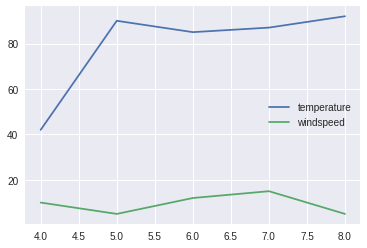

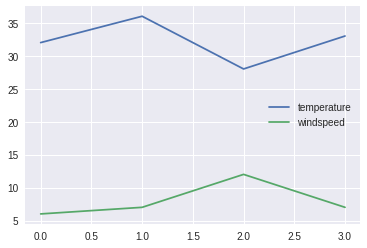

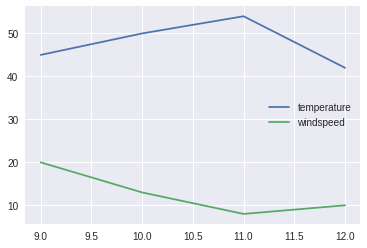

In [44]:
%matplotlib inline
g.plot()   # it will show the statistics analysis of each group of cities .

In [45]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/4/2017,mumbai,42,10,Sunny
5,1/1/2017,mumbai,90,5,Sunny
6,1/2/2017,mumbai,85,12,Fog
7,1/3/2017,mumbai,87,15,Fog
8,1/4/2017,mumbai,92,5,Rain
9,1/1/2017,paris,45,20,Sunny


In [47]:
j = df.groupby(['city','temperature'])
j.groups

{('mumbai', 42): Int64Index([4], dtype='int64'),
 ('mumbai', 85): Int64Index([6], dtype='int64'),
 ('mumbai', 87): Int64Index([7], dtype='int64'),
 ('mumbai', 90): Int64Index([5], dtype='int64'),
 ('mumbai', 92): Int64Index([8], dtype='int64'),
 ('new york', 28): Int64Index([2], dtype='int64'),
 ('new york', 32): Int64Index([0], dtype='int64'),
 ('new york', 33): Int64Index([3], dtype='int64'),
 ('new york', 36): Int64Index([1], dtype='int64'),
 ('paris', 42): Int64Index([12], dtype='int64'),
 ('paris', 45): Int64Index([9], dtype='int64'),
 ('paris', 50): Int64Index([10], dtype='int64'),
 ('paris', 54): Int64Index([11], dtype='int64')}

In [48]:
j = df.groupby(['city','windspeed'])
j.groups

{('mumbai', 5): Int64Index([5, 8], dtype='int64'),
 ('mumbai', 10): Int64Index([4], dtype='int64'),
 ('mumbai', 12): Int64Index([6], dtype='int64'),
 ('mumbai', 15): Int64Index([7], dtype='int64'),
 ('new york', 6): Int64Index([0], dtype='int64'),
 ('new york', 7): Int64Index([1, 3], dtype='int64'),
 ('new york', 12): Int64Index([2], dtype='int64'),
 ('paris', 8): Int64Index([11], dtype='int64'),
 ('paris', 10): Int64Index([12], dtype='int64'),
 ('paris', 13): Int64Index([10], dtype='int64'),
 ('paris', 20): Int64Index([9], dtype='int64')}